In [745]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [746]:
from src import ps
import time
import matplotlib.pyplot as plt
import numpy as np

co = ['lightcoral', 'yellow', 'plum', 'grey', 'royalblue', 'maroon', 'coral', 'g', 'red', 'sienna']

In [747]:
ss = ps.Schedule()
ss.load_data(1)

In [585]:
N, M, H, b, tin, tax, sec = ss.N, ss.M, ss.H, ss.b, ss.tin, ss.tax, ss.sec

In [709]:
best = 100000
start = time.time()

ti = []
fo = []

for i in range(ss.N):
    tb, ts, tf, order = ss.assign_all(i, 0)
    
    if max(tf) < best:
        best = max(tf).copy()
        clock = time.time()
        ti.append(clock - start)
        fo.append(best)
        tb_opt, ts_opt, tf_opt, order_opt = tb.copy(), ts.copy(), tf.copy(), order.copy()
        print(ti[-1], fo[-1])
        

0.5540554523468018 5739.0
1.5980587005615234 5415.0
15.249094247817993 5353.0


In [710]:
# usar para obter inalterados
tb, ts, tf, order = tb_opt.copy(), ts_opt.copy(), tf_opt.copy(), order_opt.copy()

In [727]:
best = max(tf_opt)
print(best)

tb1, ts1, tf1, order1 = tb_opt.copy(), ts_opt.copy(), tf_opt.copy(), order_opt.copy()

for i in range(2,N):
    tb0, ts0, tf0 = ss.permute_order(tb1, ts1, tf1, order1, 1, index=i)
    print(max(tf0)) 

5353.0
5328.0
5417.0
5535.0
5632.0
5705.0
5832.0
5912.0
5985.0
6103.0
6167.0
6140.0
6185.0
6218.0
6249.0
6280.0
6303.0


KeyboardInterrupt: 

In [753]:
tb1, ts1, tf1 = ss.permute_order(tb, ts, tf, order, 1, 5)

In [720]:
tb, ts, tf = permute_order(tb, ts, tf, 1, index=5)

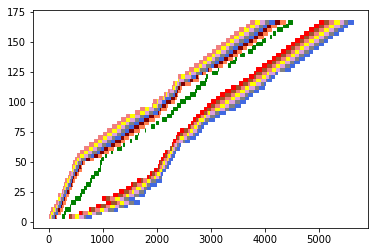

In [754]:
fig, ax = plt.subplots()
pp=0
for i in order[:7:
    pp += 3
    ax.broken_barh(ss.compute_Vb(tb1[i], ts1[i], tf1[i]), yrange=(pp,3), color=co)

In [722]:
ps.write_output(tb, ts, tf, fo, ti, 1)

In [723]:
max(tf)

5632.0

(0, 15)

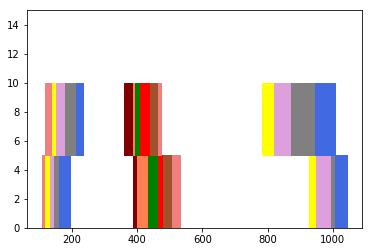

In [358]:
fig, ax = plt.subplots()
ax.broken_barh(ss.compute_Vb(tb[4], ts[4], tf[4]), yrange=(0,5), color=co)
ax.broken_barh(ss.compute_Vb(tb[16], ts[16], tf[16]), yrange=(5,5), color=co)

ax.set_ylim(0,15)

In [694]:
def permute_order(tb, ts, tf, h_perm, index):
    
    j_perm = b[h_perm] - 1
    
    ind2 = order[index]
    ind1 = order[index - 1]
    
    # times of ind2
    
    mat_tb = np.matrix(tb)
    mat_fin = mat_tb + np.matrix(compute_T(tb, ts, tf))
    
    submat_fin = mat_fin[order[:index-1],:]    
    
    for j in range(j_perm + 1, M):
        
        if j in b: #if j is preceded by a drying step
            #tempo minimo de secado e pedidos anteriores
            tb[ind2][j] = max(ts[ind2][b.index(j)] + sec[ind2][b.index(j)], int(max(submat_fin[:,j])))
        
        else:
            tb[ind2][j] = max(tb[ind2][j - 1] + tin[ind2][j - 1], int(max(submat_fin[:,j])))
            
        if j + 1 in b:
            ts[ind2][b.index(j + 1)] = tb[ind2][j] + tin[ind2][j]

        elif j == M - 1:
            tf[ind2] = tb[ind2][j] + tin[ind2][j]
    
    # falta corrigir tax
    
    new_j = j_perm + 1
    
    for j in range(j_perm + 1, M):
        
        if j + 1 in b:
            #if this bath is followed by a drying step
            new_j = j + 1
        
        elif j < M - 1 and tb[ind2][j + 1] > tb[ind2][j] + tax[ind2][j]:
            tb[ind2][new_j:j + 1] += tb[ind2][j + 1] - tb[ind2][j] - tax[ind2][j]
            
    
    # times of ind1
    
    for j in range(j_perm + 1, M):
        
        if j in b: #if j is preceded by a drying step
            #tempo minimo de secado e pedidos anteriores
            if j + 1 in b:

                tb[ind1][j] = max(ts[ind1][b.index(j)] + sec[ind1][b.index(j)], int(max(submat_fin[:,j])), ts[ind2][b.index(j + 1)])
                
            else:
                tb[ind1][j] = max(ts[ind1][b.index(j)] + sec[ind1][b.index(j)], int(max(submat_fin[:,j])), tb[ind2][j + 1])
        
        elif j < M - 1:
            if j + 1 in b:  
                tb[ind1][j] = max(tb[ind1][j - 1] + tin[ind1][j - 1], int(max(submat_fin[:,j])), ts[ind2][b.index(j + 1)])
                
            else:
                tb[ind1][j] = max(tb[ind1][j - 1] + tin[ind1][j - 1], int(max(submat_fin[:,j])), tb[ind2][j + 1])
                
        else:
            tb[ind1][j] = max(tb[ind1][j - 1] + tin[ind1][j - 1], int(max(submat_fin[:,j])), tf[ind2])
            
        if j + 1 in b:
            ts[ind1][b.index(j + 1)] = tb[ind1][j] + tin[ind1][j]

        elif j == M - 1:
            tf[ind1] = tb[ind1][j] + tin[ind1][j]
    
    # tax for ind1
    
    new_j = j_perm + 1
    
    for j in range(j_perm + 1, M):
        
        if j + 1 in b:
            #if this bath is followed by a drying step
            new_j = j + 1
        
        elif j < M - 1 and tb[ind1][j + 1] > tb[ind1][j] + tax[ind1][j]:
            tb[ind1][new_j:j + 1] += tb[ind1][j + 1] - tb[ind1][j] - tax[ind1][j]
            
    # falta reajustar seguintes pedidos
    
    
    for i, ind in enumerate(order[index + 1:]):
        mat_tb = np.matrix(tb)
        mat_fin = mat_tb + np.matrix(compute_T(tb, ts, tf))
        
        submat_fin = mat_fin[order[:index + i + 1],:]

        for j in range(j_perm + 1, M):
            
            if j in b: #if j is preceded by a drying step
                #tempo minimo de secado e pedidos anteriores
                tb[ind][j] = max(ts[ind][b.index(j)] + sec[ind][b.index(j)], int(max(submat_fin[:,j])))

            else:
                tb[ind][j] = max(tb[ind][j - 1] + tin[ind][j - 1], int(max(submat_fin[:,j])))

            if j + 1 in b:
                ts[ind][b.index(j + 1)] = tb[ind][j] + tin[ind][j]

            elif j == M - 1:
                tf[ind] = tb[ind][j] + tin[ind][j]
    
        new_j = j_perm + 1
        
        for j in range(j_perm + 1, M):

            if j + 1 in b:
                #if this bath is followed by a drying step
                new_j = j + 1

            elif j < M - 1 and tb[ind][j + 1] > tb[ind][j] + tax[ind][j]:
                tb[ind][new_j:j + 1] += tb[ind][j + 1] - tb[ind][j] - tax[ind][j]
            
            
    return tb, ts, tf

In [411]:
tb[12][6] - tb[12][5] - tax[12][5]

7.0

In [280]:
order

[3,
 7,
 10,
 4,
 16,
 12,
 21,
 0,
 20,
 6,
 18,
 24,
 2,
 27,
 13,
 26,
 22,
 25,
 15,
 5,
 17,
 1,
 11,
 9,
 19,
 14,
 8,
 23]

In [186]:
latest_req = int(max(mat_fim[order[:4-1], 5]))

matrix([[ 21.,  33.,  63.,  97., 117., 269., 276., 293., 321., 347.,
         357., 462., 494., 567., 628.],
        [ 61.,  75., 100., 117., 137., 280., 302., 335., 358., 397.,
         429., 559., 654., 726., 814.],
        [109., 136., 149., 161., 177., 334., 349., 382., 397., 437.,
         466., 728., 804., 892., 974.]])

In [682]:
mat_tb = np.matrix(tb)
mat_fin = mat_tb + np.matrix(compute_T(tb, ts, tf))
    
submat_fin = mat_fin[order,:]

In [683]:
submat_fin[:3,:]

matrix([[  21.,   53.,   62.,   95.,  124.,  131.,  147.,  277.,  403.,
          435.,  484.,  568.,  657.,  702.,  783.],
        [  53.,   82.,  107.,  135.,  171.,  179.,  215.,  311.,  613.,
          639.,  725.,  805.,  887.,  968.,  818.],
        [  84.,  120.,  135.,  171.,  180.,  215.,  246.,  391.,  777.,
          861.,  943., 1029., 1102., 1202.,  993.]])

In [684]:
compute_T(tb, ts, tf)

array([[   53.,    75.,    97.,    27.,    70.,    34.,     6.,    26.,
           89.,    64.,    96.,    57.,    53.,    21., -3282.],
       [   90.,    60.,    74.,    85.,    63.,    76.,    73.,    42.,
           72.,    84.,    86.,    82.,    80.,    86., -3622.],
       [    8.,    24.,    21.,    20.,    37.,    30.,    33.,    30.,
           31.,    24.,     9.,    37.,    16.,    20., -1149.],
       [   10.,    23.,    27.,    32.,    19.,     9.,    30.,    25.,
           85.,    17.,    83.,    87.,    45.,    47.,  -815.],
       [   92.,    95.,    75.,    76.,    96.,    14.,    19.,    43.,
           69.,    73.,    52.,    40.,    88.,   100., -2348.],
       [   31.,    11.,    39.,    23.,    39.,     5.,    29.,    26.,
           98.,    97.,    24.,    59.,    91.,    79.,  -541.],
       [   31.,    36.,    15.,    36.,     9.,    35.,    31.,    80.,
           21.,    84.,    82.,    86.,    73.,   100.,  -209.],
       [   31.,    39.,    35.,    74.,  

In [29]:
def compute_T(tb, ts, tf):
    '''returns a vector T_ij whose elements represent the time
    the request i spent on bath j'''
    
    global N, M

    T = np.zeros(shape=(N, M))
    
    for i in range(N):
        for j in range(M):
            if j == M - 1:
                T[i, j] = tf[i] - tb[i][j]
            elif j+1 in b:
                T[i, j] = ts[i][b.index(j+1)] - tb[i][j]
            else:
                T[i, j] = tb[i][j+1] - tb[i][j]
            #T[i, j] = (not S[j]) * tb[i, j+1] + S[j] * ts[i, b.index(j)] - tb[i, j]
            
    return T

In [146]:
mat_fim = Mat_tb + np.matrix(compute_T(tb, ts, tf))

In [108]:
tf[10]

1032.0

In [406]:
fo

[3734.0, 3502.0, 3501.0, 3463.0]

In [440]:
ps.write_output(tb, ts, tf, fo, ti, 99)